In [1]:
from fair import emissions_driven
import pyam
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


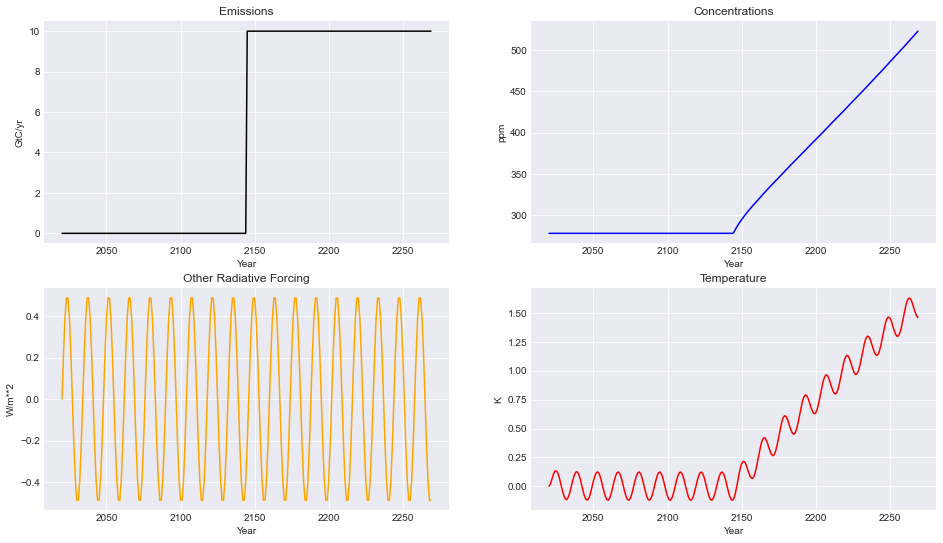

In [2]:
input_df = pd.DataFrame(
        [
            [
                "model_a",
                "scen_a",
                "World",
                "Emissions|CO2",
                "GtC/yr",
                *125*[0],
                *125*[10]
            ],
            [
                "model_a",
                "scen_a",
                "World",
                "Effective Radiative Forcing|Other",
                "W/m**2",
                *[0.5 * np.sin(2 * np.pi * (x) / 14.0) for x in range(250)]
            ],
        ],
        columns=pyam.IAMC_IDX + [*range(2020,2270)],
    )

pyam_inp_df = pyam.IamDataFrame(input_df)
cfg = {}

pyam_out_df = emissions_driven.run(pyam_inp_df, cfg)


pyam_emissions_df = pyam_out_df.filter(variable = 'Emissions|CO2')
pyam_concentrations_df = pyam_out_df.filter(variable = 'Atmospheric Concentrations|CO2')
pyam_other_forcing_df = pyam_out_df.filter(variable = 'Effective Radiative Forcing|Other')
pyam_temperature_df = pyam_out_df.filter(variable = 'Surface Temperature')

fig = plt.figure()
ax1 = fig.add_subplot(221)
pyam_emissions_df.line_plot(ax = ax1, title = 'Emissions', legend = False, color = 'black')
ax2 = fig.add_subplot(222)
pyam_concentrations_df.line_plot(ax = ax2, title = 'Concentrations', legend = False, color = 'blue')
ax3 = fig.add_subplot(223)
pyam_other_forcing_df.line_plot(ax = ax3, title = 'Other Radiative Forcing', legend = False, color = 'orange')
ax4 = fig.add_subplot(224)
pyam_temperature_df.line_plot(ax = ax4, title = 'Temperature', legend = False, color = 'red')

pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP3PD.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP45.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP6.csv`
pyam.core - INFO: Reading file `/Users/John/Documents/GitHub/FAIR/fair/RCPs/data/RCP85.csv`


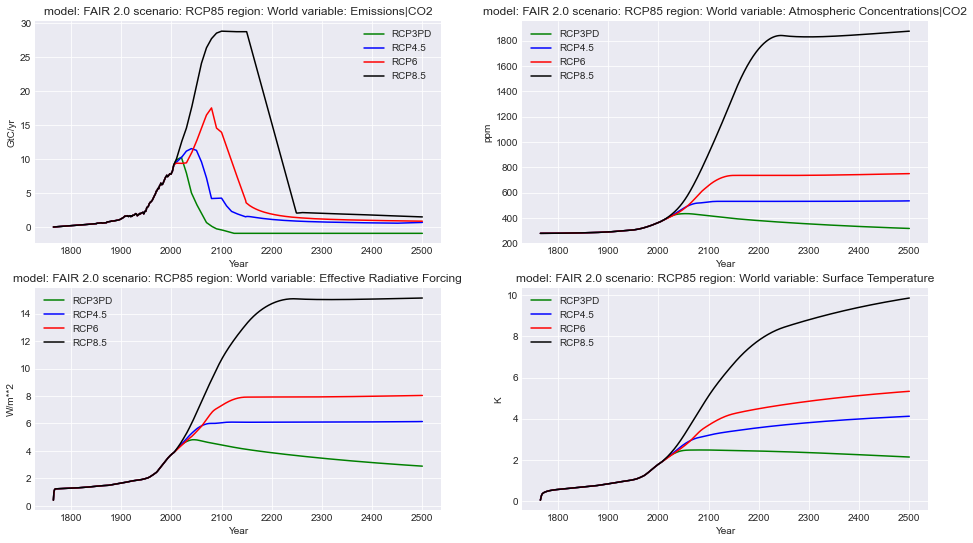

In [3]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

cfg = {}

pyam_out_df_3pd = emissions_driven.run(rcp3pd.Emissions.emissions, cfg)
pyam_out_df_3pd.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP3PD', color = 'green')

pyam_out_df_45 = emissions_driven.run(rcp45.Emissions.emissions, cfg)
pyam_out_df_45.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP4.5', color = 'blue')

pyam_out_df_6 = emissions_driven.run(rcp6.Emissions.emissions, cfg)
pyam_out_df_6.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP6', color = 'red')

pyam_out_df_85 = emissions_driven.run(rcp85.Emissions.emissions, cfg)
pyam_out_df_85.filter(variable = 'Emissions|CO2').line_plot(ax = ax1, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|CO2').line_plot(ax = ax2, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Effective Radiative Forcing').line_plot(ax = ax3, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Surface Temperature').line_plot(ax = ax4, label = 'RCP8.5', color = 'black')

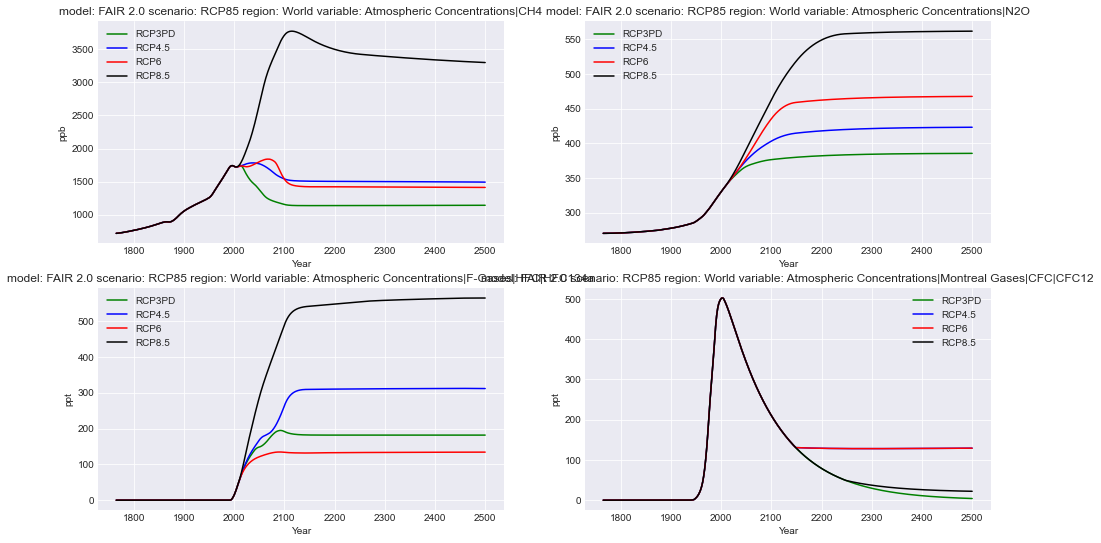

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP3PD', color = 'green')
pyam_out_df_3pd.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP3PD', color = 'green')

pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP4.5', color = 'blue')
pyam_out_df_45.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP4.5', color = 'blue')

pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP6', color = 'red')
pyam_out_df_6.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP6', color = 'red')

pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|CH4').line_plot(ax = ax1, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|N2O').line_plot(ax = ax2, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|F-Gases|HFC|HFC134a').line_plot(ax = ax3, label = 'RCP8.5', color = 'black')
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|Montreal Gases|CFC|CFC12').line_plot(ax = ax4, label = 'RCP8.5', color = 'black')

In [5]:
pyam_out_df_85.filter(variable = 'Surface Temperature').timeseries()

,,,,,1765,1766,1767,1768,1769,1770,1771,1772,1773,1774,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,,,,,
FAIR 2.0,RCP85,World,Surface Temperature,K,0.038517,0.142249,0.249232,0.314754,0.352843,0.377044,0.394626,0.408899,0.421285,0.432397,...,9.832088,9.836068,9.840035,9.843991,9.847934,9.851866,9.855786,9.859694,9.863591,9.867476


In [6]:
pd.set_option('display.max_rows', 50)
pyam_out_df_85.filter(variable = 'Effective Radiative Forcing|F-Gases|*').timeseries()[2020]

model     scenario  region  variable                                            unit  
FAIR 2.0  RCP85     World   Effective Radiative Forcing|F-Gases|HFC|HFC125      W/m**2    0.006106
                            Effective Radiative Forcing|F-Gases|HFC|HFC134a     W/m**2    0.017862
                            Effective Radiative Forcing|F-Gases|HFC|HFC143a     W/m**2    0.004541
                            Effective Radiative Forcing|F-Gases|HFC|HFC227ea    W/m**2    0.000814
                            Effective Radiative Forcing|F-Gases|HFC|HFC23       W/m**2    0.004553
                            Effective Radiative Forcing|F-Gases|HFC|HFC245fa    W/m**2    0.007802
                            Effective Radiative Forcing|F-Gases|HFC|HFC32       W/m**2    0.002574
                            Effective Radiative Forcing|F-Gases|HFC|HFC4310mee  W/m**2    0.000538
                            Effective Radiative Forcing|F-Gases|PFC|C2F6        W/m**2    0.001223
                      

In [7]:
pyam_out_df_85.filter(variable = 'Effective Radiative Forcing|Montreal Gases|*').timeseries()[2020]

model     scenario  region  variable                                                                   unit  
FAIR 2.0  RCP85     World   Effective Radiative Forcing|Montreal Gases|CCl4                            W/m**2    1.265098e-02
                            Effective Radiative Forcing|Montreal Gases|CCl4|Aerosol Cloud Interaction  W/m**2   -5.597797e-03
                            Effective Radiative Forcing|Montreal Gases|CFC|CFC11                       W/m**2    5.386864e-02
                            Effective Radiative Forcing|Montreal Gases|CFC|CFC113                      W/m**2    1.896775e-02
                            Effective Radiative Forcing|Montreal Gases|CFC|CFC113|Stratospheric O3     W/m**2   -1.524400e-03
                            Effective Radiative Forcing|Montreal Gases|CFC|CFC114                      W/m**2    4.201877e-03
                            Effective Radiative Forcing|Montreal Gases|CFC|CFC114|Stratospheric O3     W/m**2   -9.926405e-05
        

In [8]:
pyam_out_df_85.filter(variable = 'Atmospheric Concentrations|Montreal Gases|*').timeseries()[2020]

model     scenario  region  variable                                              unit
FAIR 2.0  RCP85     World   Atmospheric Concentrations|Montreal Gases|CCl4        ppt      72.706811
                            Atmospheric Concentrations|Montreal Gases|CFC|CFC11   ppt     207.187074
                            Atmospheric Concentrations|Montreal Gases|CFC|CFC113  ppt      63.225826
                            Atmospheric Concentrations|Montreal Gases|CFC|CFC114  ppt      13.554441
                            Atmospheric Concentrations|Montreal Gases|CFC|CFC115  ppt       8.072560
                            Atmospheric Concentrations|Montreal Gases|CFC|CFC12   ppt     451.567993
                            Atmospheric Concentrations|Montreal Gases|CH3Br       ppt       7.398760
                            Atmospheric Concentrations|Montreal Gases|CH3CCl3     ppt       1.345567
                            Atmospheric Concentrations|Montreal Gases|CH3Cl       ppt     352.607343
    